In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"F:\data sets\New folder\WIPRO.csv")

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 15 columns):
Date                  5020 non-null object
Symbol                5020 non-null object
Series                5020 non-null object
Prev Close            5020 non-null float64
Open                  5020 non-null float64
High                  5020 non-null float64
Low                   5020 non-null float64
Last                  5020 non-null float64
Close                 5020 non-null float64
VWAP                  5020 non-null float64
Volume                5020 non-null int64
Turnover              5020 non-null float64
Trades                2169 non-null float64
Deliverable Volume    4511 non-null float64
%Deliverble           4511 non-null float64
dtypes: float64(11), int64(1), object(3)
memory usage: 588.4+ KB


In [5]:
np.sum(data.isnull())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2851
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [6]:
data.drop(['Symbol','Series','Prev Close','Open','Last','Low','Close','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble'],inplace=True,axis=1)

In [7]:
data.head()

,Date,High
0,2000-01-03,2724.20
1,2000-01-04,2942.15
2,2000-01-05,3177.55
3,2000-01-06,3183.00
4,2000-01-07,2751.00


In [8]:
data['Date']=pd.to_datetime(data['Date'])

In [9]:
data=data.set_index('Date')

In [10]:
data.head()

,High
Date,
2000-01-03,2724.20
2000-01-04,2942.15
2000-01-05,3177.55
2000-01-06,3183.00
2000-01-07,2751.00


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2000-01-03 to 2020-02-28
Data columns (total 1 columns):
High    5020 non-null float64
dtypes: float64(1)
memory usage: 78.4 KB


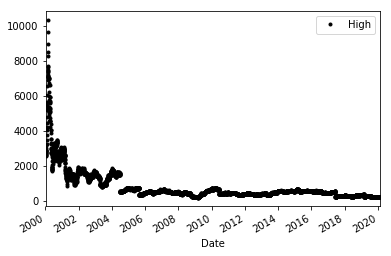

In [16]:
data.plot(style='k.',)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024932CB1710>]],
      dtype=object)

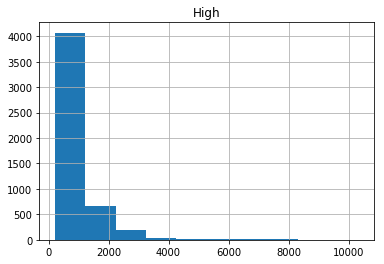

In [17]:
data.hist()

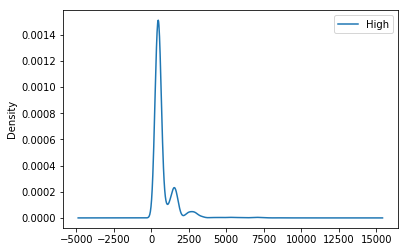

In [21]:
data.plot(kind='kde')
plt.show()

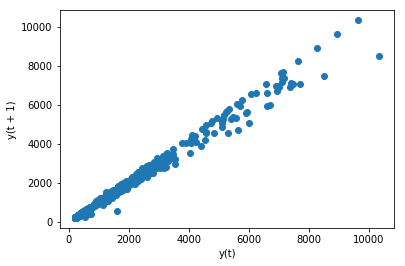

In [26]:
from pandas.plotting import lag_plot
lag_plot(data)

In [37]:
modeefieddata=data.diff(periods=1)
modeefieddata.dropna(inplace=True)
modeefieddata.head()

,High
Date,
2000-01-04,217.95
2000-01-05,235.40
2000-01-06,5.45
2000-01-07,-432.00
2000-01-10,162.50


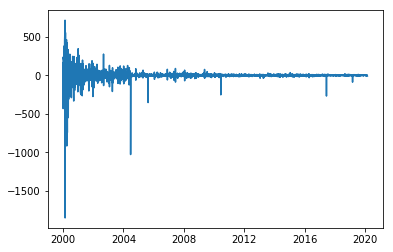

In [38]:
plt.plot(modeefieddata)

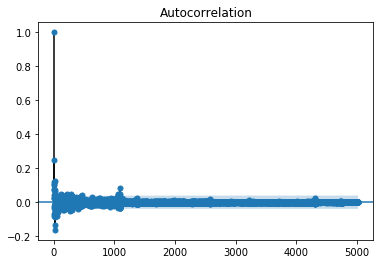

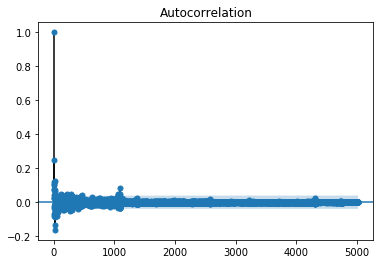

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(modeefieddata)

In [40]:
features=modeefieddata.values
train=features[:4015]
test=features[4015:]

In [41]:
from statsmodels.tsa.arima_model import ARIMA
p=1
d=1
q=1
model=ARIMA(train,order=(p,d,q))
finalmodel=model.fit()

In [42]:
finalmodel.aic

45818.035925317694

In [43]:
test.shape

(1004, 1)

In [44]:
predict=finalmodel.forecast(steps=1004)

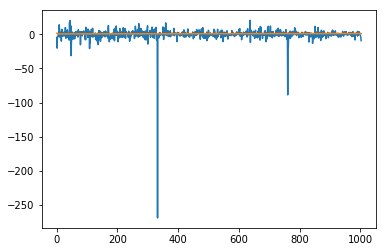

In [45]:
plt.plot(test)
plt.plot(predict[0])